In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

todays_date = datetime.today()
csv_path = "test.csv"
csv = pd.read_csv(csv_path)
packets = pd.DataFrame(csv)
packets

,protocol,source_ip,destination_ip,src_port,dst_port,payload_size,flags,date,time
0,ICMP,192.168.0.17,8.8.8.8,NaN,NaN,NaN,NaN,2021-03-12,13:27:50
1,ICMP,8.8.8.8,192.168.0.17,NaN,NaN,NaN,NaN,2021-03-12,13:27:50
2,ICMP,192.168.0.17,8.8.8.8,NaN,NaN,NaN,NaN,2021-03-12,13:27:51
3,ICMP,8.8.8.8,192.168.0.17,NaN,NaN,NaN,NaN,2021-03-12,13:27:51
4,TCP,192.168.0.16,52.114.75.78,55370.0,443.0,1500.0,ACK,2021-03-12,13:27:51
...,...,...,...,...,...,...,...,...,...
587,TCP,192.168.0.17,192.168.0.16,59390.0,80.0,44.0,SYN,2021-03-04,15:46:50
588,TCP,192.168.0.17,192.168.0.16,59391.0,80.0,44.0,SYN,2021-03-04,15:46:50
589,UDP,192.168.0.32,224.0.0.251,5353.0,5353.0,167.0,NaN,2021-03-04,15:47:13
590,UDP,192.168.0.32,224.0.0.251,5353.0,5353.0,140.0,NaN,2021-03-04,15:47:14


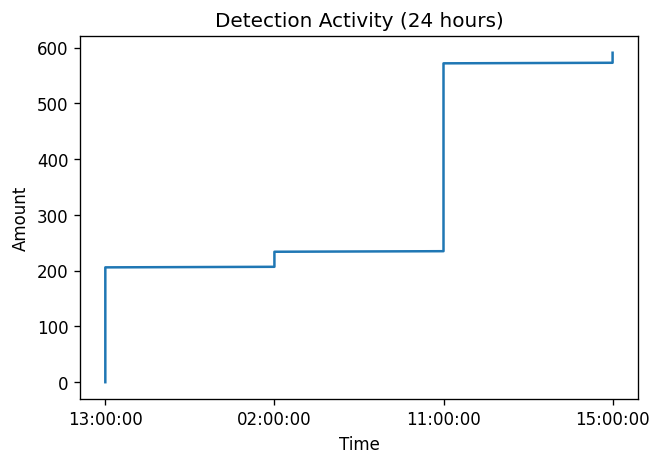

In [79]:
fig, ax = plt.subplots(dpi=120)
ax = plt.gca()
packets['date'] = pd.to_datetime(packets['date'], yearfirst=True)
packets[packets['date'] > pd.Timestamp.now()]
packet_time = pd.to_datetime(packets['time'], format='%H:%M:%S').dt.strftime('%H').add(':00:00')
ax.plot(packet_time, packets.index)
ax.set_xlabel("Time")
ax.set_ylabel("Amount")
plt.title('Detection Activity (24 hours)')
plt.show()